# Fisher Linear Discriminant

In this exercise, you will apply Fisher Linear Discriminant as described in Chapter 3.8.2 of Duda et al. on the UCI Abalone dataset. A description of the dataset is given at the page https://archive.ics.uci.edu/ml/datasets/Abalone. The following two methods are provided for your convenience: 


* **`utils.Abalone.__init__(self)`** reads the Abalone data and instantiates three data matrices of size (1528, 7), (1307, 7), and (1342, 7) corresponding to the three classes in the dataset: *male (M)*, *female (F)*, and *infant (I)*.


* **`utils.Abalone.plot(self,w)`** produces a histogram of the data when projected onto a vector `w`, and where each class is shown in a different color.


Sample code that makes use of these two methods is given below. It loads the data, looks at the shape of instantiated matrices, and plots various projections of the data: (1) projection on the first dimension of the data, and (2) projection on a random direction.

(1528, 7) (1307, 7) (1342, 7)


C:\Users\htlsh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


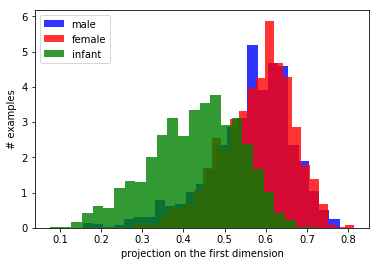

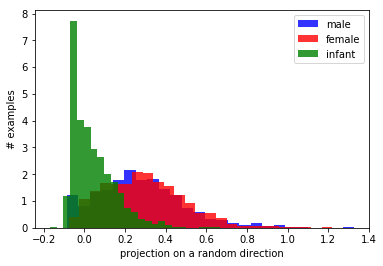

In [8]:
%matplotlib inline
import utils,numpy

# Load the data
abalone = utils.Abalone()

# Print dataset size for each class
print(abalone.M.shape,abalone.F.shape, abalone.I.shape)

# Project data on the first dimension
w1 = numpy.array([1,0,0,0,0,0,0])
abalone.plot(w1,'projection on the first dimension')

# Project data on a random direction
w2 = numpy.random.normal(0,1,[7])
w2 /= (w2**2).sum()**.5
abalone.plot(w2,'projection on a random direction')

## Implementation (30 P)

* **Create a method `w = fisher(X1,X2)` that takes as input the data for two classes and returns the Fisher linear discriminant.**


* **Create a method `J(X1,X2,w)` that evaluates the objective defined in Equation 96 of Duda et al. for an arbitrary projection vector `w`.**


* **Create a method `z = phi(X)` that returns a quadratic expansion for each data point `x` in the dataset. Such expansion consists of the vector `x` itself, to which we concatenate the vector of all pairwise products between elements of `x`.** In other words, letting $x = (x_1,\dots,x_d)$ denote the $d$-dimensional data point, the quadratic expansion for this data point is a $d \cdot (d+3)/2$ dimensional vector given by $\phi(x) = (x_i)_{1 \leq i \leq d} \cup (x_i x_j)_{1 \leq i \leq j \leq d}$. For example, the quadratic expansion for $d=2$ is $(x_1,x_2,x_1^2,x_2^2,x_1 x_2)$.

In [12]:
def SW(X):
    return numpy.dot((X-X.mean(axis = 0)).T,(X-X.mean(axis = 0)))

def fisher(X1,X2):
    w = numpy.dot(numpy.linalg.inv(SW(X1)+SW(X2)),X1.mean(axis = 0)-X2.mean(axis = 0))
    w = w/(w**2).sum()**.5
    return w
    
def J(X1,X2,w):
    X1m = X1.mean(axis = 0)
    X2m = X2.mean(axis = 0)
    S1 = SW(X1)
    S2 = SW(X2)
    S = S1+S2
    N = numpy.dot(X1m-X2m,w)**2
    D=  numpy.dot(numpy.dot(w,S),w)
    return N/D * 1000

def phi(X):
    Y = []
    for x in X:
        ind = numpy.triu_indices(X.shape[1])
        Y += [numpy.concatenate([x,numpy.outer(x,x)[ind]])]
    Y = numpy.array(Y)
    print(Y.shape)
    return Y


In [13]:
##### YOUR CODE HERE
import numpy

def fisher(X1,X2):
    m1 = numpy.mean(X1,axis = 0)
    m2 = numpy.mean(X2,axis = 0)
    m1 = m1.reshape(1,m1.shape[0])
    m2 = m2.reshape(1,m2.shape[0])
    Sw = (X1 - m1).T.dot(X1 - m1) + (X2 - m2).T.dot(X2 - m2)
    w = (m1 - m2).dot(numpy.linalg.inv(Sw))
    w = w/numpy.linalg.norm(w)
    return w

def J(X1,X2,w):
    m1 = numpy.mean(X1,axis = 0)
    m2 = numpy.mean(X2,axis = 0)
    m1 = m1.reshape(1,m1.shape[0])
    m2 = m2.reshape(1,m2.shape[0])
    Sw = (X1 - m1).T.dot(X1 - m1) + (X2 - m2).T.dot(X2 - m2)
    Sb = (m1 - m2).T.dot(m1 - m2)
    J = (w.dot(Sb).dot(w.T))/(w.dot(Sw).dot(w.T))
    #J = J[0][0]
    return J

def phi(X):
    d = X.shape[1]
    z = numpy.zeros([X.shape[0],int(d*(d + 3)/2)])
    
    for i in range(X.shape[0]):
        x = X[i,:]
        x = x.reshape(1,d)
        Z = numpy.dot(x.T,x)
        index = numpy.triu_indices(d)
        z[i,:] = numpy.append(x,Z[index])
    return z
###

In [14]:
def phi(X):
    d = X.shape[1]
    z = numpy.zeros([X.shape[0],d*(d + 3)/2])
    z[:,:d] = X[:,:d]
    X_2 = X**2
    z[:,d:2d] = X_2[:,d]
    
    Z = X(:,numpy.newaxis,:)
    z[:,d:2d] = numpy.diag[x]
    
    for i in range(d):
        for j in range(d):
            if i != j :
                z[:,2d:] = numpy.append(X[:,i]*X[:,j])
                  
    #for x in (2d + d*(d-1)/2) :
    #z[:,2d] = numpy.append(for x in numpy.diag(Z))
    #z[2d,:] = numpy.append(for x in numpy.triu(X,1))
    return z
###

SyntaxError: invalid syntax (<ipython-input-14-e3aab17e4390>, line 6)

## Analysis (20 P)

* **Print the value of `J(w)` for each discriminated pair of classes (M/F, M/I, F/I), and for several values of `w`:**

  * `w` is a vector that projects the data on the each dimension of the data.
  * `w` is the difference between the mean vectors of the two classes.
  * `w` is the difference between the mean vectors of the two classes (after quadratic expansion of the data).
  * `w` is the Fisher linear discriminant.
  * `w` is the Fisher linear discriminant (after quadratic expansion of the data).


* **For the simple Fisher linear discriminant, plot a histogram of the projected data for each discriminated pair of classes using the function `utils.Abalone.plot()`.**

       w                  M/F                  M/I                   F/I          
---------------------------------------------------------------------------------------
   Dimension 0          0.00001              0.00056               0.00090
   Dimension 1          0.00001              0.00060               0.00097
   Dimension 2          0.00001              0.00058               0.00072
   Dimension 3          0.00001              0.00070               0.00108
   Dimension 4          0.00000              0.00060               0.00088
   Dimension 5          0.00001              0.00069               0.00109
   Dimension 6          0.00001              0.00066               0.00100
_______________________________________________________________________________________
   Means Linear         0.00001              0.00070               0.00108
   Means Quadratic      0.00000              0.00054               0.00083
------------------------------------------------------------------

C:\Users\htlsh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


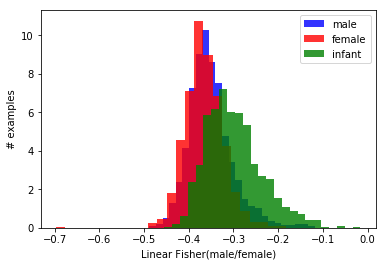

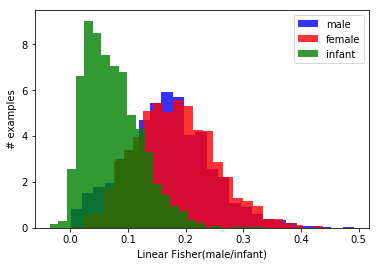

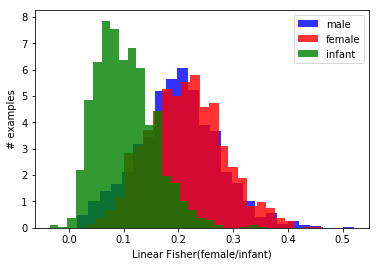

In [15]:
##### REPLACE BY YOUR CODE
%matplotlib inline
M = abalone.M
F = abalone.F
I = abalone.I
M_q = phi(M)
F_q = phi(F)
I_q = phi(I)

print("       w        ","         M/F        ","         M/I         ","         F/I          ")
print("---------------------------------------------------------------------------------------")
for i in range(M.shape[1]):
    w = numpy.zeros([1,M.shape[1]])
    w[0][i] = 1
    print("   Dimension {i}".format(i = i), "         {JMF:.5f}".format(JMF = float(J(M,F,w))),
          "             {JMI:.5f}".format(JMI = float(J(M,I,w))),
          "              {JFI:.5f}".format(JFI = float(J(F,I,w))))
    
print("_______________________________________________________________________________________")

w_m_mf = M.mean(axis = 0) - F.mean(axis = 0)
w_m_mi = M.mean(axis = 0) - I.mean(axis = 0)
w_m_fi = F.mean(axis = 0) - I.mean(axis = 0)
print("   Means Linear", "        {JMF:.5f}".format(JMF = float(J(M,F,w_m_mf))),
          "             {JMI:.5f}".format(JMI = float(J(M,I,w_m_mi))),
          "              {JFI:.5f}".format(JFI = float(J(F,I,w_m_fi))))
w_m_mf_q = phi(M).mean(axis = 0) - phi(F).mean(axis = 0)
w_m_mi_q = phi(M).mean(axis = 0) - phi(I).mean(axis = 0)
w_m_fi_q = phi(F).mean(axis = 0) - phi(I).mean(axis = 0)
print("   Means Quadratic", "     {JMF:.5f}".format(JMF = float(J(phi(M),phi(F),w_m_mf_q))),
          "             {JMI:.5f}".format(JMI = float(J(phi(M),phi(I),w_m_mi_q))),
          "              {JFI:.5f}".format(JFI = float(J(phi(F),phi(I),w_m_fi_q))))

print("---------------------------------------------------------------------------------------")
w_f_mf = fisher(M,F)
w_f_mi = fisher(M,I)
w_f_fi = fisher(F,I)
print("   Fisher Linear", "       {JMF:.5f}".format(JMF = float(J(M,F,w_f_mf))),
          "             {JMI:.5f}".format(JMI = float(J(M,I,w_f_mi))),
          "              {JFI:.5f}".format(JFI = float(J(F,I,w_f_fi))))
w_f_mf_q = fisher(M_q,F_q)
w_f_mi_q = fisher(M_q,I_q)
w_f_fi_q = fisher(F_q,I_q)
print("   Fisher Quadratic", "    {JMF:.5f}".format(JMF = float(J(M_q,F_q,w_f_mf_q))),
          "             {JMI:.5f}".format(JMI = float(J(M_q,I_q,w_f_mi_q))),
          "              {JFI:.5f}".format(JFI = float(J(F_q,I_q,w_f_fi_q))))

abalone.plot(w_f_mf.T,"Linear Fisher(male/female)")
abalone.plot(w_f_mi.T,"Linear Fisher(male/infant)")
abalone.plot(w_f_fi.T,"Linear Fisher(female/infant)")
#####